<a href="https://colab.research.google.com/github/GrifffinGENG/GrifffinGENG/blob/main/French_Degroot_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import importlib

# **Model Construction**

### Time-varing French-Degroot Model

In [111]:
def belief_generation(n):
  # np.random.seed(2023)
  # generate a stchastoic belief matrix
  matrix = np.random.rand(n, n)

  k = (n*n - n) - 200
  indices = np.random.choice(n*n, k, replace=False)
  rows, cols = np.unravel_index(indices, (n, n))
  while np.any(np.bincount(rows) == n):
    indices = np.random.choice(n*n, k, replace=False)
    rows, cols = np.unravel_index(indices, (n, n))
  matrix[rows, cols] = 0

  row_sum = np.sum(matrix, axis = 1)
  belief = np.divide(matrix, row_sum[:, None]+1e-8)
  # print("belief matrix A is: ")
  # print(belief)
  # print("")
  # print("Verification: ")
  # print(np.sum(belief, axis=1))
  return belief

In [82]:
def initial_state_generation(n):
  # np.random.seed(2024)
  matrix = np.random.rand(1, n)
  row_sum = np.sum(matrix, axis = 1)
  state_T = np.divide(matrix, row_sum[:, None])
  state = np.transpose(state_T)
  # print("initial state x(0) is: ")
  # print(state)
  # print("")
  return state

In [83]:
def french_degroot_process(n, t): # n is agent number, t is the iteration number
  belief = belief_generation(n)
  state = initial_state_generation(n)
  process = np.zeros((n, t+1))
  process[:, 0] = state.ravel()
  for i in range(t):
    # update the opinion state with the belief matrix
    # i from 0 to t-1
    state = np.dot(belief, state)
    process[:, i+1] = state.ravel()
  # print("the process matrix is: ")
  # print(process)
  # print("")
  return process

In [84]:
def french_degroot_plot(process):
  n = process.shape[0]
  t = process.shape[1]
  # print(n)
  # print(t)
  T = list(range(t)) # the x-axis for time
  # print(T)

  for i in range(n):
    # plt.plot(T, process[i, :], label="x_{}".format(i+1))
    plt.plot(T, process[i, :])

  plt.title('Opinion Dynamics')
  plt.xlabel('Time')
  plt.ylabel('Opinion Values')

  # plt.ylim(0, 1)

  plt.legend()

  plt.show() # plt.savefig('state.png')


# **Model Simulation**

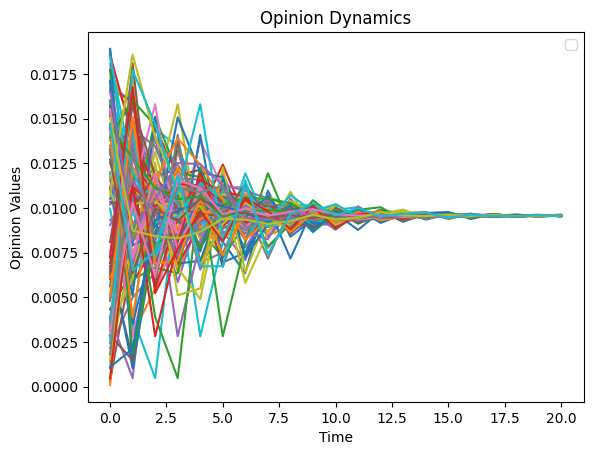

In [118]:
n = 100
t = 20
process = french_degroot_process(n, t)
french_degroot_plot(process)